In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
iris = load_iris(as_frame=True)
X,y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [3]:
print(f"Accuracy: {accuracy_score(y_test,y_pred):.4f}")

Accuracy: 0.9111


In [4]:
results = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})

wrong = results[results['Actual'] != results['Predicted']]
correct = results[results['Actual'] == results['Predicted']]
print(wrong)

     Actual  Predicted
133       2          1
138       2          1
134       2          1
106       2          1


<Axes: >

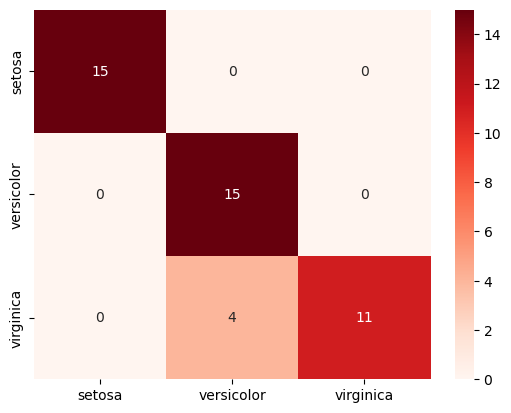

In [5]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Reds',
            xticklabels=iris.target_names, yticklabels=iris.target_names)